# Diabetes Prediction using Machine Learning Agorithms

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read dataset

In [2]:
data= pd.read_csv('pima-indians-diabetes.csv')

### Analyzing our Dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_preg      768 non-null    int64  
 1   glucose_conc  768 non-null    int64  
 2   diastolic_bp  768 non-null    int64  
 3   thickness     768 non-null    int64  
 4   insulin       768 non-null    int64  
 5   bmi           768 non-null    float64
 6   diab_pred     768 non-null    float64
 7   age           768 non-null    int64  
 8   diabetes      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.tail()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
data.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Data cleaning

In [7]:
data.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'diabetes'],
      dtype='object')

In [8]:
data.dtypes

num_preg          int64
glucose_conc      int64
diastolic_bp      int64
thickness         int64
insulin           int64
bmi             float64
diab_pred       float64
age               int64
diabetes          int64
dtype: object

In [9]:
print(data.isnull().sum())

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
diabetes        0
dtype: int64


### Feature Selection using correlation

In [10]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

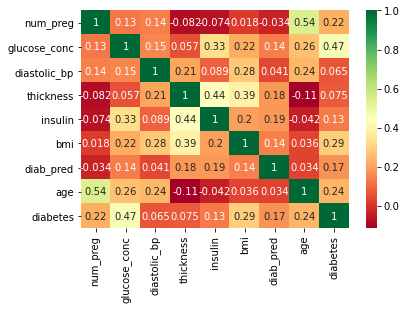

In [11]:
#plot heat map

g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [12]:
data.corr()#print pairwise correlation of the columns

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


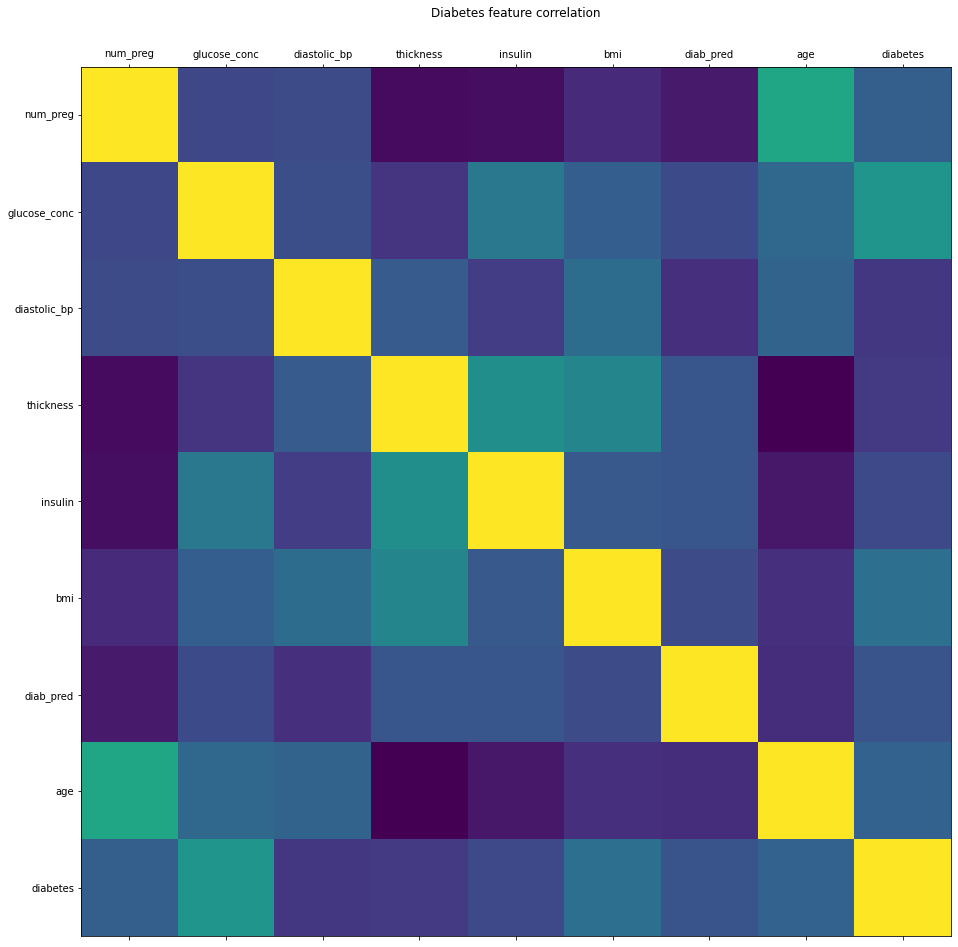

In [13]:
def plot_corr(df, size = 16):
  
    corr = df.corr() # data frame correlation function.
    fig, ax = plt.subplots(figsize = (size, size))
    cax = ax.matshow(corr) # color code the rectange by correlation value
    # pass the no of columns and their names for labeling x & y cells 
    plt.xticks(range(len(corr.columns)), corr.columns) # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns) # draw y tick marks
    plt.title('Diabetes feature correlation')

plot_corr(data)

### Inspecting for balanced dataset

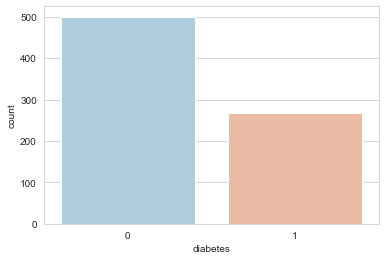

In [14]:
sns.set_style('whitegrid')

sns.countplot(x='diabetes', data=data, palette='RdBu_r')

In [15]:
num_true = len(data.loc[data['diabetes'] == 1])
num_false = len(data.loc[data['diabetes'] == 0])
percentage_true = (num_true / (num_true + num_false)) * 100
percentage_false = (num_false / (num_true + num_false)) * 100
print('Number of true cases: {0} ({1:2.2f}%)'.format(num_true, percentage_true))
print('Number of false cases: {0} ({1:2.2f}%)'.format(num_false, percentage_false))

Number of true cases: 268 (34.90%)
Number of false cases: 500 (65.10%)


### Data Preprocessing

In [16]:
diabetes_map = {True:1,False:0}
data['diabetes'] = data['diabetes'].map(diabetes_map)

In [17]:
data.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Data Visualization

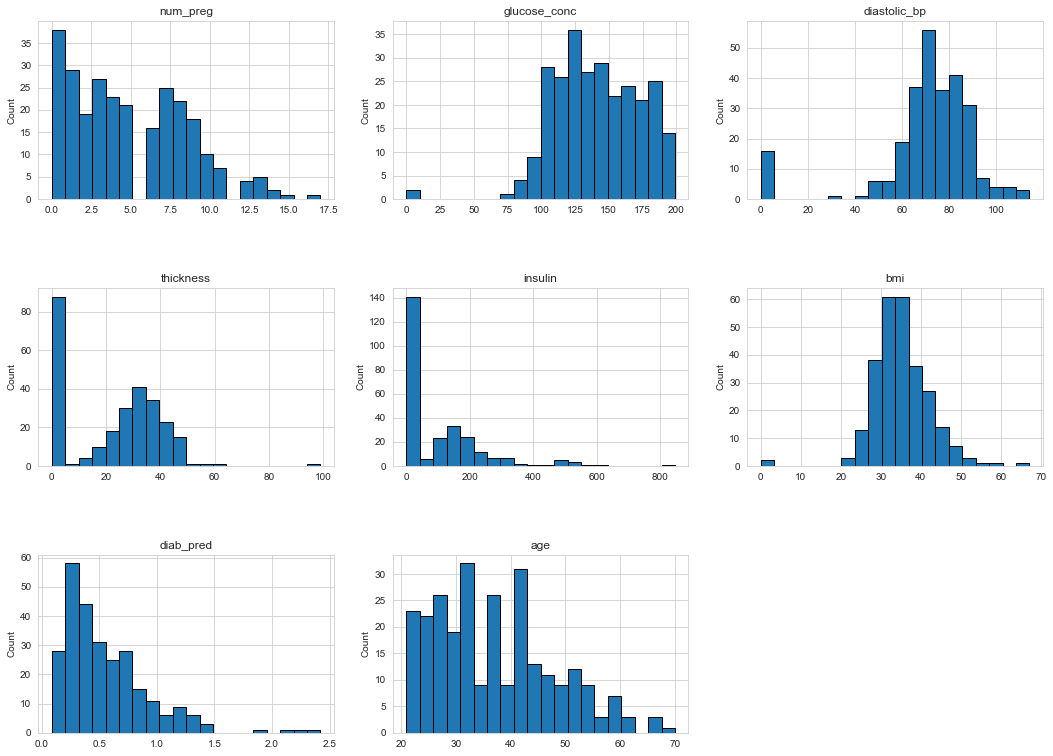

In [18]:
#General Analysis
import itertools
data1 = data[data["diabetes"]==1]
columns = data.columns[:8]
plt.subplots(figsize=(18,18))
length =len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    plt.ylabel("Count")
    data1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

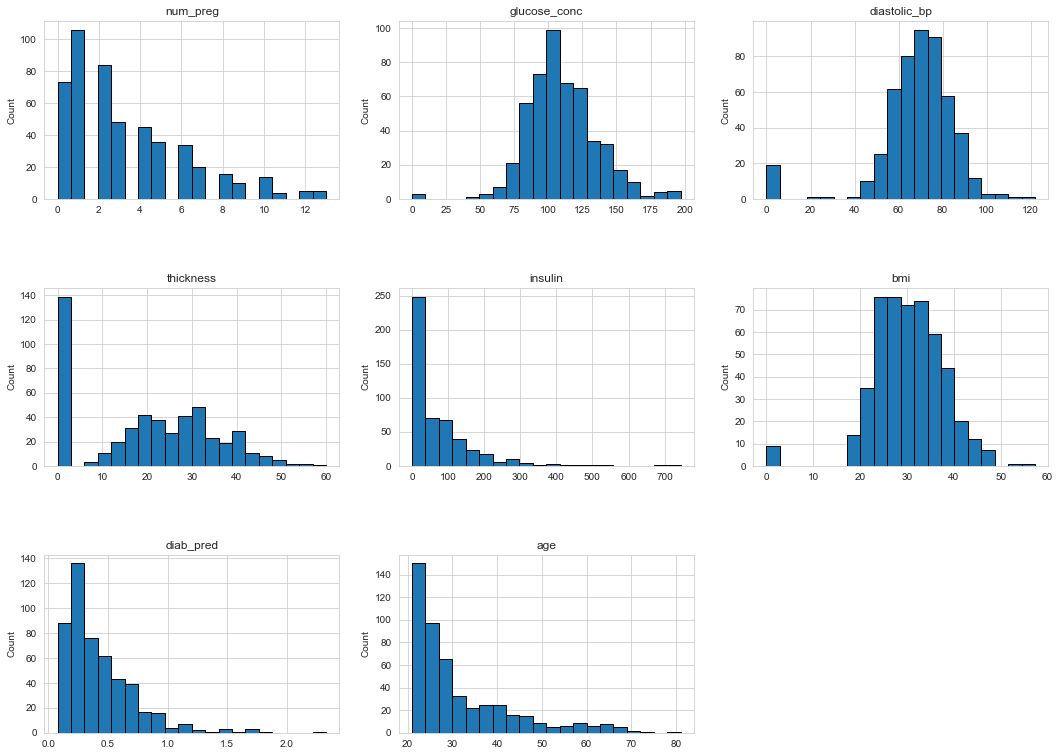

In [19]:
#General Analysis
#Non-diabetic cases
import itertools
data1 = data[data["diabetes"]==0]
columns = data.columns[:8]
plt.subplots(figsize=(18,18))
length =len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    plt.ylabel("Count")
    data1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

### Splitting data into Training and Testing data

In [20]:
from sklearn.model_selection import train_test_split # import training test split method from sklearn

# creating independent features
feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']
# split our data into two data frames one containing the features cols and other with the diabetes result
X = data[feature_col_names].values #8cols
Y = data[predicted_class_names].values # 1col

split_test_size = 0.30 # define the train_test split ratio 30%

# These data frames and the split size are passed to the function which then return four numpy arrays of data
# the arrays contain the values of test and training feature cols and the test and train diabetes results
# Since the splitting process must be random we pass the random_state any value
# random_state sets the seed for the random no generator used as part of the splitting process
# setting the seed to a constant ensures that if the function is run again the split will be identical
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = split_test_size, random_state = 42)
#  here data.index is the whole data frame
print('{0:0.2f}% in training set'.format((len(X_train) / len(data.index)) * 100))
print('{0:0.2f}% in test set'.format((len(X_test) / len(data.index)) * 100))

69.92% in training set
30.08% in test set


In [21]:
print("Number of rows missing glucose_conc:{0}".format(len(data.loc[data['glucose_conc']==0])))
print("Number of rows missing diastolic_bp:{0}".format(len(data.loc[data['diastolic_bp']==0])))
print("Number of rows missing insulin:{0}".format(len(data.loc[data['insulin']==0])))
print("Number of rows missing bmi:{0}".format(len(data.loc[data['bmi']==0])))
print("Number of rows missing diab_pred:{0}".format(len(data.loc[data['diab_pred']==0])))
print("Number of rows missing age:{0}".format(len(data.loc[data['age']==0])))
print("Number of rows missing thickness:{0}".format(len(data.loc[data['thickness']==0])))

Number of rows missing glucose_conc:5
Number of rows missing diastolic_bp:35
Number of rows missing insulin:374
Number of rows missing bmi:11
Number of rows missing diab_pred:0
Number of rows missing age:0
Number of rows missing thickness:227


### Imputing the data

In [22]:
from sklearn.impute import SimpleImputer


In [24]:
fill_values = SimpleImputer(missing_values = 0, strategy = 'mean')

In [25]:
X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

In [26]:
# import Naive Bayes algorithm from the library
# In case of naive_bayes there are multiple implementations 
# we are using the gaussian algo that assumes that the feature data is distributed in a normal gaussian form
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with data
nb_model = GaussianNB() # our model object

# call the fit method to create a model trained with the training data 
# numpy.ravel returns a contiguous flattened array
nb_model.fit(X_train, Y_train.ravel())

GaussianNB()

In [28]:
# pass feature data to the models predict function
# the predict function will return 1's and 0's representing True and False
#nb_predict_train = nb_model.predict(X_train)
# import metrics
from sklearn import metrics
# Accuracy
train_accuracy = metrics.accuracy_score(Y_train, nb_predict_train) # will be b/w 0 & 1
print('Accuracy(%) on training data itself: {0: .4f}'.format(train_accuracy * 100))

Accuracy(%) on training data itself:  75.4190


In [29]:
# Now lets predict against the testing data
# pass feature data to the models predict function
nb_predict_test = nb_model.predict(X_test)
# Y_test is the actual output and nb_predict_tes/t is the predicted one 
test_accuracy = metrics.accuracy_score(Y_test, nb_predict_test)
print('Accuracy(%) on test data: {0: .4f}'.format(test_accuracy * 100))

Accuracy(%) on test data:  73.5931


In [30]:
# Printing Confusion matrix 
print('Confusion Matrix')
# the labels are for 1 = True to upper left and 0 = False to lower right
print(metrics.confusion_matrix(Y_test, nb_predict_test, labels=[1, 0]))
print('')

Confusion Matrix
[[ 52  28]
 [ 33 118]]



In [31]:
#the classification report generates statistics based on the values shown in the confusion matrix.
print('Classification report')
print(metrics.classification_report(Y_test, nb_predict_test, labels = [1, 0]))

Classification report
              precision    recall  f1-score   support

           1       0.61      0.65      0.63        80
           0       0.81      0.78      0.79       151

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



In [32]:
print("Please enter the details in the following order:")
print("Number of pregnancies,Glucose concentration(<140mg/dl),Diastolic Blood pressure(<60mmHg),Skin Thickness(<=23mm),\ninsulin(16-166mIU/L),BodyMassIndex(BMI)(18-25 kg/ height),Age,Diabetes Pedigree Function")
print("\n")
x_demo=[[1,111,65,25,25,0.350,35,1.3]]
print(x_demo)
if nb_model.predict(x_demo)==0:
    print("Person is likely to NOT have diabetes")
else:
    print("Person is likely to have diabetes")


Please enter the details in the following order:
Number of pregnancies,Glucose concentration(<140mg/dl),Diastolic Blood pressure(<60mmHg),Skin Thickness(<=23mm),
insulin(16-166mIU/L),BodyMassIndex(BMI)(18-25 kg/ height),Age,Diabetes Pedigree Function


[[1, 111, 65, 25, 25, 0.35, 35, 1.3]]
Person is likely to have diabetes


In [33]:
print("Please enter the details in the following order:")
print("Number of pregnancies,Glucose concentration(<140mg/dl),Diastolic Blood pressure(<60mmHg),Skin Thickness(<=23mm),\ninsulin(16-166mIU/L),BodyMassIndex(BMI)(18-25 kg/ height),Age,Diabetes Pedigree Function")
print("\n")
x_demo=[[1,85,66,29,0,26.6,0.351,31]]
print(x_demo)
if nb_model.predict(x_demo)==0:
    print("Person is likely to NOT have diabetes")
else:
    print("Person is likely to have diabetes")

Please enter the details in the following order:
Number of pregnancies,Glucose concentration(<140mg/dl),Diastolic Blood pressure(<60mmHg),Skin Thickness(<=23mm),
insulin(16-166mIU/L),BodyMassIndex(BMI)(18-25 kg/ height),Age,Diabetes Pedigree Function


[[1, 85, 66, 29, 0, 26.6, 0.351, 31]]
Person is likely to NOT have diabetes


In [34]:
# import the algo from sci-kit learn linear model module
from sklearn.linear_model import LogisticRegression

In [35]:
# set up the model
# C - regulatization hyperparameter 
lr_model = LogisticRegression(C=0.7, random_state=54) # set c to 0.7 initially

In [36]:
# train the algo
lr_model.fit(X_train, Y_train.ravel())

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.7, random_state=54)

In [37]:
# evaluate against the training data
#lr_predict_train = lr_model.predict(X_train)
# training metrics
print('Logistic Regression -> Accuracy on training data: {0:.4f}'.format(metrics.accuracy_score(Y_train, lr_predict_train)))

Logistic Regression -> Accuracy on training data: 0.7858


In [38]:
lr_predict_test = lr_model.predict(X_test)
# training metrics
print('Logistic Regression -> Accuracy on test data: Accuracy: {0:.4f}'.format(metrics.accuracy_score(Y_test, lr_predict_test)))

Logistic Regression -> Accuracy on test data: Accuracy: 0.7489


In [39]:
print(metrics.confusion_matrix(Y_test, lr_predict_test, labels=[1, 0]))
print('')
print('Classification report')
print(metrics.classification_report(Y_test, lr_predict_test, labels=[1, 0]))

[[ 48  32]
 [ 26 125]]

Classification report
              precision    recall  f1-score   support

           1       0.65      0.60      0.62        80
           0       0.80      0.83      0.81       151

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



In [40]:
print("Please enter the details in the following order:")
print("Number of pregnancies,Glucose concentration(<140mg/dl),Diastolic Blood pressure(<60mmHg),Skin Thickness(<=23mm),\ninsulin(16-166mIU/L),BodyMassIndex(BMI)(18-25 kg/ height),Diabetes Pedigree Function,Age")
print("\n")
x_demo=[[2,90,60,60,35,0.329,40,0.000]]
print(x_demo)
if lr_model.predict(x_demo)==0:
    print("Person is likely to NOT have diabetes")
else:
    print("Person is likely to have diabetes")

Please enter the details in the following order:
Number of pregnancies,Glucose concentration(<140mg/dl),Diastolic Blood pressure(<60mmHg),Skin Thickness(<=23mm),
insulin(16-166mIU/L),BodyMassIndex(BMI)(18-25 kg/ height),Diabetes Pedigree Function,Age


[[2, 90, 60, 60, 35, 0.329, 40, 0.0]]
Person is likely to have diabetes


In [41]:
x_demo=[[1,85,66,29,0,26.6,0.351,31]]
if lr_model.predict(x_demo)==0:
    print("Person is likely to NOT have diabetes")
else:
    print("Person is likely to have diabetes")

Person is likely to NOT have diabetes
